In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications import densenet
# from keras.models import Sequential, Model, load_model
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
# from keras import regularizers
# from keras import backend as K


# # Import Keras libraries
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications import densenet
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import backend as K


# Import Keras libraries
import keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# df1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_letters.csv")
# df2=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_digits.csv")
# df3=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/space_19_1_78.csv")
# df4=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/space_19_2_78.csv")

In [0]:
# train1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_letters.csv")
# train2=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_digits.csv")

In [0]:
# y_train1=df1.iloc[:,:1].values
# y_train1=y_train1-65
# df1["0"]=y_train1

# y_train2=df2.iloc[:,:1].values
# y_train2=y_train2+26
# df2["0"]=y_train2

# y_train3=df3.iloc[:,:1].values
# y_train3=y_train3+36
# df3["0"]=y_train3

# y_train4=df4.iloc[:,:1].values
# y_train4=y_train4+36
# df4["0"]=y_train4

In [0]:
# df=pd.DataFrame()
# df=pd.concat([df1,df2,df3,df4,df3,df4])
# print(df.shape)

# df.to_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_letters_digits_space_78.csv", index=False)

(119540, 6085)


In [0]:
# test1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/test/test_letters.csv")
# test2=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/test/test_digits.csv")
# test3=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/test/space_20_1_78.csv")

In [0]:
# y_test1=test1.iloc[:,:1].values
# y_test1=y_test1-65
# test1["0"]=y_test1

# y_test2=test2.iloc[:,:1].values
# y_test2=y_test2+26
# test2["0"]=y_test2

# y_test3=test3.iloc[:,:1].values
# y_test3=y_test3+36
# test3["0"]=y_test3

In [0]:
# df=pd.DataFrame()
# df=pd.concat([test1,test2,test3])
# print(df.shape)

# df.to_csv("/content/gdrive/My Drive/Colab Notebooks/results/test/test_letters_digits_space_78.csv", index=False)

(10359, 6085)


In [0]:
train=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/train/train_letters_space_78.csv")
test=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/results/test/test_letters_space_78.csv")

#### Train Images

In [0]:
from keras.utils import to_categorical
from tqdm import tqdm
from keras.preprocessing import image

# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
  im_buf = train.values[i][1:]
  im_array = np.int8(np.reshape(im_buf, (78, 78))) 
  #img = image.load_img(train.iloc[:,1:].as_matrix().astype('str'), target_size=(64,64,1), color_mode='grayscale')
  img = image.img_to_array(im_array)
  img = img/255
  train_image.append(img)
X_train = np.array(train_image)
X_train = np.repeat(X_train, 3, -1)

100%|██████████| 94829/94829 [00:19<00:00, 4774.91it/s]


In [0]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074,6075,6076,6077,6078,6079,6080,6081,6082,6083,6084
119535,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119536,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119537,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119538,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119539,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train=train.iloc[:,:1].values
#y_train=y_train-65
y_train = to_categorical(y_train)

#### Test Images

In [0]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
test_image = []
for i in tqdm(range(test.shape[0])):
  im_buf = test.values[i][1:]
  im_array = np.int8(np.reshape(im_buf, (78, 78))) 
  #img = image.load_img(train.iloc[:,1:].as_matrix().astype('str'), target_size=(64,64,1), color_mode='grayscale')
  img = image.img_to_array(im_array)
  img = img/255
  test_image.append(img)
X_test = np.array(test_image)
X_test = np.repeat(X_test, 3, -1)

100%|██████████| 8064/8064 [00:02<00:00, 3753.24it/s]


In [0]:
y_test=test.iloc[:,:1].values
#y_test=y_test-65
y_test = to_categorical(y_test)

#### Model Builiding

In [0]:
from tensorflow.python.keras import applications

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D

In [0]:
def build_model():
    #base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     #weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     #include_top=False,
                                     #pooling='avg')
    base_model=applications.inception_resnet_v2.InceptionResNetV2(weights= None, include_top=False, input_shape= (78,78,3))
    for layer in base_model.layers:
          layer.trainable = True

#     x = base_model.output
#     x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     predictions = Dense(n_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
    x = base_model.output
    # x = Dense(128, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    # x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.40)(x)
    predictions = Dense(units=27, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)
    
    return model

In [0]:
model = build_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 78, 78, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 38, 38, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 38, 38, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 38, 38, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

#### Model Fit

In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),shuffle=True)

Epoch 1/10
2964/2964 [==============================] - 365s 123ms/step - loss: 0.3505 - acc: 0.9038 - mse: 0.0054 - val_loss: 0.8057 - val_acc: 0.8481 - val_mse: 0.0092
Epoch 2/10
2964/2964 [==============================] - 362s 122ms/step - loss: 0.1887 - acc: 0.9493 - mse: 0.0029 - val_loss: 0.3004 - val_acc: 0.9283 - val_mse: 0.0041
Epoch 3/10
2964/2964 [==============================] - 362s 122ms/step - loss: 0.1473 - acc: 0.9600 - mse: 0.0023 - val_loss: 0.2514 - val_acc: 0.9435 - val_mse: 0.0033
Epoch 4/10
2964/2964 [==============================] - 361s 122ms/step - loss: 0.1236 - acc: 0.9671 - mse: 0.0019 - val_loss: 0.3143 - val_acc: 0.9328 - val_mse: 0.0039
Epoch 5/10
2964/2964 [==============================] - 361s 122ms/step - loss: 0.1025 - acc: 0.9724 - mse: 0.0016 - val_loss: 0.2146 - val_acc: 0.9540 - val_mse: 0.0028
Epoch 6/10
2964/2964 [==============================] - 362s 122ms/step - loss: 0.0934 - acc: 0.9759 - mse: 0.0014 - val_loss: 0.2089 - val_acc: 0.951

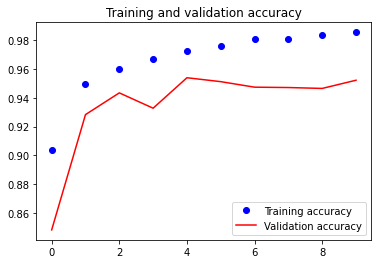

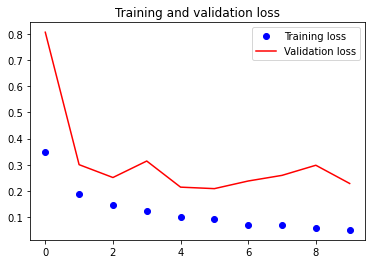

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/model_letters_space_xx.h5')
model.save_weights('/content/gdrive/My Drive/Colab Notebooks/model_weights_letters_space_xx.h5')
#model.load_weights('my_model_weights.h5')

In [0]:
# import sklearn.metrics as metrics

# y_pred_ohe = KerasClassifier.predict(X)  # shape=(n_samples, 12)
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)

In [0]:
# from sklearn.metrics import classification_report

# y_pred = model.predict(x_test, batch_size=64, verbose=1)
# y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_bool))

In [0]:
d# Inception model

from keras.layers import Input
input_img = Input(shape = (32, 32, 3))


from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(128, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(128, (3,3), padding='same', activation='relu')(tower_1)
tower_1= Dropout(0.3)(tower_1)
tower_2 = Conv2D(128, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(128, (5,5), padding='same', activation='relu')(tower_2)
tower_2= Dropout(0.3)(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)


output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)


from keras.layers import Flatten, Dense
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

from keras.models import Model
model = Model(inputs = input_img, outputs = out)
print (model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_174 (Conv2D)             (None, 32, 32, 128)  512         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_176 (Conv2D)             (None, 32, 32, 128)  512         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_175 (Conv2D)             (None, 32, 32, 128)  147584      conv2d_174[0][0]                 
___________________________________________________________________________________________

In [0]:
# creating a mlp model
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(1000, activation='relu',kernel_initializer='uniform',input_shape=(32, 32,3)))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32, 32, 1000)      4000      
_________________________________________________________________
dense_12 (Dense)             (None, 32, 32, 500)       500500    
_________________________________________________________________
dense_13 (Dense)             (None, 32, 32, 150)       75150     
_________________________________________________________________
dense_14 (Dense)             (None, 32, 32, 10)        1510      
_________________________________________________________________
activation_612 (Activation)  (None, 32, 32, 10)        0         
Total params: 581,160
Trainable params: 581,160
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test),shuffle=True)

Train on 24711 samples, validate on 2295 samples
Epoch 1/5
24711/24711 [==============================] - 211s 9ms/step - loss: 0.0114 - acc: 0.9969 - mean_squared_error: 4.8363e-04 - val_loss: 0.2531 - val_acc: 0.9490 - val_mean_squared_error: 0.0084
Epoch 2/5
24711/24711 [==============================] - 210s 9ms/step - loss: 0.0167 - acc: 0.9960 - mean_squared_error: 6.4538e-04 - val_loss: 0.1909 - val_acc: 0.9569 - val_mean_squared_error: 0.0070
Epoch 3/5
24711/24711 [==============================] - 210s 9ms/step - loss: 0.0411 - acc: 0.9920 - mean_squared_error: 0.0014 - val_loss: 0.1158 - val_acc: 0.9795 - val_mean_squared_error: 0.0036
Epoch 4/5
24711/24711 [==============================] - 210s 8ms/step - loss: 0.0130 - acc: 0.9969 - mean_squared_error: 5.2588e-04 - val_loss: 0.1086 - val_acc: 0.9760 - val_mean_squared_error: 0.0037
Epoch 5/5
24711/24711 [==============================] - 210s 9ms/step - loss: 0.0071 - acc: 0.9979 - mean_squared_error: 3.2507e-04 - val_loss

In [0]:
 model.save('/content/gdrive/My Drive/Colab Notebooks/model_digits_97.h5')

In [0]:
# # We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
# from tqdm import tqdm
# from keras.utils import to_categorical
# from keras.preprocessing import image
# test_image = []
# for i in tqdm(range(test.shape[0])):
#     im_buf = test.values[i][0:]
#     im_array = np.int8(np.reshape(im_buf, (32, 32))) 
#     #img = image.load_img(train.iloc[:,1:].as_matrix().astype('str'), target_size=(64,64,1), color_mode='grayscale')
#     img = image.img_to_array(im_array)
#     img = img/255
#     test_image.append(img)
# X_test = np.array(test_image)
# X_test = np.repeat(X_test, 3, -1)

In [0]:
model = load_model("/content/gdrive/My Drive/Colab Notebooks/model_all chars_89.h5")

AttributeError: ignored

In [0]:
# pred=model.predict(X_test)
# for i in pred:
#   print(i)

In [0]:
# np.argmax(pred, axis=1)

In [0]:
	
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
 
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
# define model input
visible = Input(shape=(32, 32, 3))
# add inception block 1
layer = inception_module(visible, 96, 96, 64, 64, 32, 32)
layer=Dropout(0.5)(layer)
# add inception block 1
# layer = inception_module(layer, 64, 64, 64, 64, 32, 32)
# layer=Dropout(0.5)(layer)
layer = inception_module(layer, 64, 64, 32, 32, 40, 40)

# create model

from keras.layers import Flatten, Dense
output = Flatten()(layer)
out    = Dense(10, activation='softmax')(output)
# model = Model(inputs = input_img, outputs = out)
model = Model(inputs=visible, outputs=out)


# summarize model
#model.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='inception_module.png')

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),shuffle=True)

ValueError: ignored

In [0]:
 model.save('/content/gdrive/My Drive/Colab Notebooks/model_digits_trial_85.h5')

In [0]:
# old_model = load_model('/content/drive/My Drive/colab/my_letters16.h5')

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
cnn1 = Sequential()
cnn1.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
cnn1.add(Dropout(0.4))
cnn1.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
# cnn1.add(Dropout(0.4))
#cnn1.add(MaxPooling2D(pool_size=(2, 2)))
# cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
# cnn1.add(MaxPooling2D(pool_size=(2, 2)))
# cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# cnn1.add(Dropout(0.6))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(10, activation='softmax'))
#cnn1.summary()

RuntimeError: ignored

In [0]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
history = cnn1.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test),shuffle=True)

Train on 10000 samples, validate on 2295 samples
Epoch 1/75
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6735 - acc: 0.7165 - val_loss: 8.9809 - val_acc: 0.2205
Epoch 2/75
10000/10000 [==============================] - 7s 691us/step - loss: 0.2295 - acc: 0.9226 - val_loss: 9.3981 - val_acc: 0.2209
Epoch 3/75
10000/10000 [==============================] - 7s 690us/step - loss: 0.1814 - acc: 0.9373 - val_loss: 9.4056 - val_acc: 0.2279
Epoch 4/75
10000/10000 [==============================] - 7s 693us/step - loss: 0.1337 - acc: 0.9546 - val_loss: 9.1252 - val_acc: 0.2545
Epoch 5/75
10000/10000 [==============================] - 7s 698us/step - loss: 0.0934 - acc: 0.9691 - val_loss: 9.7815 - val_acc: 0.2475
Epoch 6/75
10000/10000 [==============================] - 7s 687us/step - loss: 0.0723 - acc: 0.9753 - val_loss: 9.6621 - val_acc: 0.2728
Epoch 7/75
10000/10000 [==============================] - 7s 692us/step - loss: 0.0613 - acc: 0.9797 - val_loss: 9.8648 - va

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32, 32, 1024)      4096      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 1024)      0         
_________________________________________________________________
dense_8 (Dense)              (None, 32, 32, 512)       524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 512)       0         
_________________________________________________________________
dense_9 (Dense)              (None, 32, 32, 128)       65664     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
dense_10 (Dense)             (None, 32, 32, 6)        

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test),shuffle=True)

RuntimeError: ignored

In [0]:
def build_model():
    base_model = densenet.DenseNet121(input_shape=(32, 32, 3),
                                     #weights='imagenet',
                                     include_top=False,
                                     pooling='avg')
    for layer in base_model.layers:
      layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Activation('relu')(x)
    x = Dense(150, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Activation('relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model


In [0]:
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
___________________________

In [0]:
history = model.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test),shuffle=True)

Train on 30000 samples, validate on 2295 samples
Epoch 1/75
 6528/30000 [=====>........................] - ETA: 3:52 - loss: 192.0089 - acc: 0.1055

KeyboardInterrupt: ignored

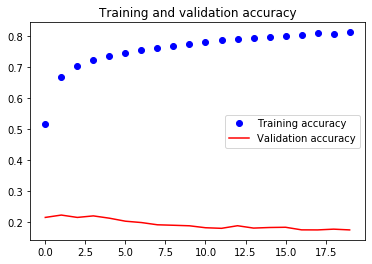

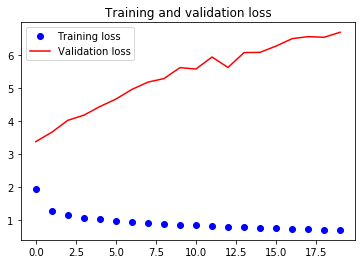

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [0]:
# define input sequence


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

  
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

RuntimeError: ignored